# Executive Summary

The case involves two target variables - **whether a respondent received the H1N1 flu vaccine and whether they received the seasonal flu vaccine**. These variables are binary, meaning the answer is either "yes" or "no." Some respondents received both vaccines, some received only one, and some received none at all.

There are 35 features in the dataset, with the first column being a unique identifier for each respondent. The remaining features are related to the respondent's level of concern and knowledge about H1N1, their behavior in response to the outbreak, whether they received vaccine recommendations from a doctor, their chronic medical conditions, whether they have regular contact with a child under 6 months old, whether they are a healthcare worker, and their opinions on vaccine effectiveness and potential risks. There are also demographic factors such as age, education, race, income, and employment status.

**Workflow**

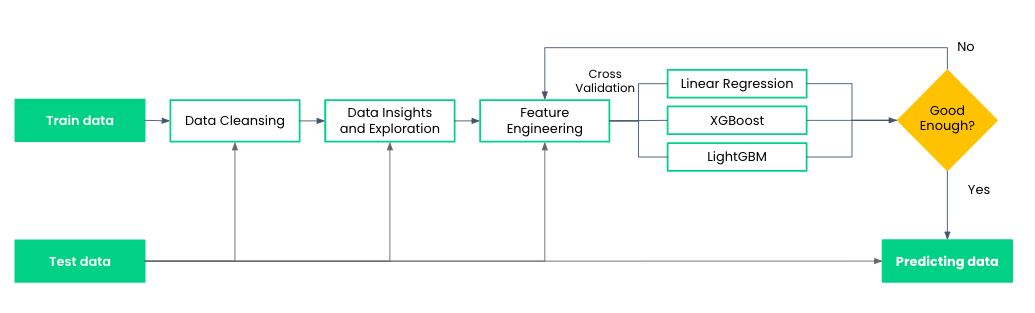

# 1. Research Design

## 1.1 Research Questions
What factors influence the likelihood of people getting the H1N1 flu vaccine and the seasonal flu vaccine?

## 1.2 Hypothesis
We hypothesize that demographic factors such as **age**, **race**, and **income**, as well as factors related to **health beliefs**, **healthcare access**, and **prior vaccination history** will significantly impact the likelihood of individuals getting the H1N1 and seasonal flu vaccines

## 1.3 Data Collection
The data is collected from the 2009 National H1N1 Flu Survey (NHFS) conducted by the Centers for Disease Control and Prevention (CDC). The dataset includes information on 27,708 individuals as test set and 26,707 as train set including demographic information, health beliefs, healthcare access, and vaccination history.

## 1.4 Variables
* h1n1_concern: Level of concern about the H1N1 flu.
* h1n1_knowledge: Level of knowledge about the H1N1 flu.
* behavioral_antiviral_meds: Whether the individual has taken antiviral medications.
* behavioral_avoidance: Whether the individual has avoided close contact with others with flu-like symptoms.
* behavioral_face_mask: Whether the individual has bought a face mask.
* behavioral_wash_hands: Whether the individual has frequently washed hands or used hand sanitizer.
* behavioral_large_gatherings: Whether the individual has reduced time at large gatherings.
* behavioral_outside_home: Whether the individual has reduced contact with people outside of their own household.
* behavioral_touch_face: Whether the individual has avoided touching their eyes, nose, or mouth.
* doctor_recc_h1n1: Whether the individual's doctor recommended the H1N1 flu vaccine.
* doctor_recc_seasonal: Whether the individual's doctor recommended the seasonal flu vaccine.
* chronic_med_condition: Whether the individual has any chronic medical conditions.
* child_under_6_months: Whether the individual has regular close contact with a child under the age of six months.
* health_worker: Whether the individual is a healthcare worker.
* health_insurance: Whether the individual has health insurance.
* opinion_h1n1_vacc_effective: The individual's opinion about the effectiveness of the H1N1 vaccine.
* opinion_h1n1_risk: The individual's opinion about their risk of getting sick with the H1N1 flu without the vaccine.
* opinion_h1n1_sick_from_vacc: The individual's worry of getting sick from taking the H1N1 vaccine.
* opinion_seas_vacc_effective: The individual's opinion about the effectiveness of the seasonal flu vaccine.
* opinion_seas_risk: The individual's opinion about their risk of getting sick with the seasonal flu without the vaccine.
* opinion_seas_sick_from_vacc: The individual's worry of getting sick from taking the seasonal flu vaccine.
* age_group: The age group of the respondent.
* education: The self-reported education level of the respondent.
* race: The race of the respondent.
* sex: The sex of the respondent.
* income_poverty: The household annual income of the respondent with respect to 2008 Census poverty thresholds.
* marital_status: The marital status of the respondent.
* rent_or_own: The housing situation of the respondent.
* employment_status: The employment status of the respondent.
* hhs_geo_region: The respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services.
* census_msa: The respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
* household_adults: The number of other adults in the respondent's household, top-coded to 3.
* household_children: The number of children in the respondent's household, top-coded to 3.
* employment_industry: The type of industry in which the respondent is employed.
* employment_occupation: The type of occupation of the respondent

## 1.5 Data Analysis
We conduct analysis using several machine learning models including LightGBM and CatBoost to determine the factors that significantly impact the likelihood of individuals getting the H1N1 and seasonal flu vaccines. We also conduct chi-square tests to examine the relationships between independent variables and vaccine uptake.

## 1.6 Limitations 
There are some limitations to this study. The data is from a single survey conducted in 2009, so the results may not be generalizable to other populations or to more recent flu seasons. Additionally, the study relies on self-reported data, which may be subject to recall bias or social desirability bias.

## 1.7 Conclusion
The results of this study provides valuable insights into the factors that impact vaccine uptake for the H1N1 and seasonal flu vaccines. These insights can be used to develop targeted interventions to improve vaccine uptake and reduce the burden of flu on the population.

# 2. Data Understanding

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dac-find-it-2023/training_set_features.csv
/kaggle/input/dac-find-it-2023/test_set_features.csv
/kaggle/input/dac-find-it-2023/training_set_labels.csv
/kaggle/input/dac-find-it-2023/submission_format.csv


In [3]:
# Import necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Set the default figure size to 19 inches wide by 7 inches tall
rcParams['figure.figsize']  = 19,7

# Set the default line width to 2.5
rcParams['lines.linewidth'] = 2.5

# Set the font size for the x-axis tick labels to 9
rcParams['xtick.labelsize'] = 9

# Set the font size for the y-axis tick labels to 9
rcParams['ytick.labelsize'] = 9

# Set the font size for the plot title to 13 and the title weight to 550
rcParams['axes.titlesize']  = 13
rcParams['axes.titleweight']  = 550

# Show gridlines on the plot
rcParams['axes.grid'] = True

# Set the transparency of the gridlines to 0.19
rcParams['grid.alpha'] = 0.19

# Plot the gridlines below the data points
plt.rc('axes',axisbelow=True)

# Hide the top, bottom, left, and right spines of the plot
plt.rc('axes.spines',top=False,bottom=False,left=False,right=False)

# Set the maximum number of columns that will be displayed in a Pandas DataFrame to 100
pd.set_option('display.max_columns',100)

# Define a color palette to be used in the plots
palette=['#F5634A', '#FF9C5B', '#FAD089','#3B8183']


In [5]:
# Set the option to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Read the training set features, test set features, training set labels, and submission format csv files and store them in the respective dataframes
train = pd.read_csv('/kaggle/input/dac-find-it-2023/training_set_features.csv')
test = pd.read_csv('/kaggle/input/dac-find-it-2023/test_set_features.csv')
val = pd.read_csv('/kaggle/input/dac-find-it-2023/training_set_labels.csv')
submission = pd.read_csv('/kaggle/input/dac-find-it-2023/submission_format.csv')

In [6]:
# The code below is a series of pandas DataFrame methods used to explore the 'train' dataset.

train.head(2) # Displays the first two rows of the 'train' DataFrame.

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe


In [45]:
train.info() # Prints a concise summary of the 'train' DataFrame, including the column names, number of non-null values, and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [7]:
train.isna().sum()/train.shape[0]*100 # Calculates the percentage of missing values in each column of the 'train' DataFrame.

respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

In [8]:
train.nunique() # Returns the count of unique values for each column in the 'train' DataFrame.

respondent_id                  26707
h1n1_concern                       4
h1n1_knowledge                     3
behavioral_antiviral_meds          2
behavioral_avoidance               2
behavioral_face_mask               2
behavioral_wash_hands              2
behavioral_large_gatherings        2
behavioral_outside_home            2
behavioral_touch_face              2
doctor_recc_h1n1                   2
doctor_recc_seasonal               2
chronic_med_condition              2
child_under_6_months               2
health_worker                      2
health_insurance                   2
opinion_h1n1_vacc_effective        5
opinion_h1n1_risk                  5
opinion_h1n1_sick_from_vacc        5
opinion_seas_vacc_effective        5
opinion_seas_risk                  5
opinion_seas_sick_from_vacc        5
age_group                          5
education                          4
race                               4
sex                                2
income_poverty                     3
m

In [9]:
train.describe() # Generates a statistical summary of the 'train' DataFrame, including the count, mean, standard deviation, minimum and maximum values, and the quartiles of the data.

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [10]:
train.duplicated().sum() # Returns the number of duplicate rows in the 'train' DataFrame.

0

Seems there is no duplicate problem in the dataset

# 3. Data Preprocessing

**Drop unnecessary columns**

- hhs_geo_region
- employment_industry
- employment_occupation

In [11]:
col_categories = ['hhs_geo_region','employment_industry','employment_occupation','race']

## 3.1 Change string values into numerical

In [12]:
## Function to mapping string values into numberical
def preprocess_data(data):
    # Drop unnecessary columns
    data.drop(['employment_industry','employment_occupation'],axis=1,inplace=True, errors='ignore')
    
    # Define the values to replace the existing values for each column
    age_mapping = {
    '65+ Years': 70,
    '55 - 64 Years': 60,
    '45 - 54 Years': 50,
    '35 - 44 Years': 40,
    '18 - 34 Years': 26}

    edu_mapping = {
        'College Graduate': 3,
        'Some College': 2,
        '12 Years': 1,
        '< 12 Years': 0}

    income_mapping = {
        '<= $75,000, Above Poverty': 1,
        '> $75,000': 2,
        'Below Poverty': 0}

    sex_mapping = {
        'Male': 1,
        'Female': 0}

    marital_mapping = {
        'Married': 1,
        'Not Married': 0}

    rent_mapping = {
        'Own': 1,
        'Rent': 0}

    employment_mapping = {
        'Employed': 2,
        'Not in Labor Force': 1,
        'Unemployed': 0}

    region_mapping = {
        'MSA, Not Principle  City': 2,
        'MSA, Principle City': 1,
        'Non-MSA': 0}

    list_mapping = age_mapping, edu_mapping, sex_mapping, income_mapping, marital_mapping, rent_mapping, employment_mapping, region_mapping

    # Perform looping to map the values of all columns above
    for col, mapping in zip(data.drop(['race','hhs_geo_region'],axis=1).select_dtypes('object').columns, list_mapping):
        data[col] = data[col].map(mapping)
    
    return data

In [13]:
# store new dataset in new variables
train_filtered = preprocess_data(train)
test_new = preprocess_data(test)

Replace values to be modeled for the sake of imputing missing values in certain columns. This is due to the use of machine learning algorithm to handle the missing values later on

In [14]:
cols_to_replace = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
                     'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

# define the mapping of values that you want to replace
value_map = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}

# replace the values in each column using a for loop
for col in cols_to_replace:
    train_filtered[col] = train_filtered[col].replace(value_map)
    test_new[col] = test_new[col].replace(value_map)

## 3.2 Handling Missing Values
We create three lists to handle the missing values. 

Each list contains multiple columns, and missing values from each column will be based on the predictions of other columns in the list. The model to be used is LightGBM because it can handle complex and large data in an efficient way

In [15]:
from lightgbm import LGBMClassifier

columns_to_impute1 = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
                     'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'education',
                     'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'h1n1_concern',
                     'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'h1n1_knowledge']
columns_to_impute2 = ['education', 'income_poverty', 'marital_status', 'rent_or_own', 'health_worker', 
                      'household_adults', 'household_children', 'employment_status', 'h1n1_knowledge']
columns_to_impute3 = ['doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker']

# Function to impute the missing values
def impute_missing_values_with_lgbm(dataset, columns_to_impute):
    for column in columns_to_impute:
        # Split the dataset into two parts: one with missing values and one without
        dummy = dataset[columns_to_impute]
        if dummy[column].isna().sum() != 0:
            dummy_missing = dummy[dummy[column].isna()]
            dummy_not_missing = dummy[~dummy[column].isna()]

            # Define the X and y variables for training the LGBM model
            X_train = dummy_not_missing.drop(column, axis=1)
            y_train = dummy_not_missing[column].astype(int)

            # Train the LGBM model
            clf = LGBMClassifier(random_state=0)
            clf.fit(X_train, y_train)

            # Predict the missing values using the trained model
            X_test = dummy_missing.drop(column, axis=1)
            y_pred = clf.predict(X_test)

            # Combine the two parts of the dataset back into one
            dataset.loc[dummy_missing.index, column] = y_pred
        else:
            continue
        
    return dataset

In [16]:
# Perform the function
for columns in [columns_to_impute1, columns_to_impute2, columns_to_impute3]:
    train_filtered = impute_missing_values_with_lgbm(train_filtered, columns)
    test_new = impute_missing_values_with_lgbm(test_new, columns)

Since `health_insurance` contain more than 40% missing values, we didn't put it into one of the previous lists. Hence, the column will be used only as dependent variable, not as one of predictors to impute missing values in other columns.

The predictors for `health_insurance` would be the first list since most of the columns seem to make sense. 
For example, people who have high concern and knowledge might be more likely to have health insurance

In [17]:

def impute_health_insurance(dataset):
    dummy_new = dataset[columns_to_impute1+['health_insurance']]
    dummy_missing_new = dummy_new[dummy_new['health_insurance'].isna()]
    dummy_not_missing_new = dummy_new[~dummy_new['health_insurance'].isna()]

    X_train_hi = dummy_not_missing_new.drop('health_insurance', axis=1)
    y_train_hi = dummy_not_missing_new['health_insurance'].astype(int)

    clf_hi = LGBMClassifier()
    clf_hi.fit(X_train_hi, y_train_hi)

    #Predict the missing values using the trained model
    X_test_hi = dummy_missing_new.drop('health_insurance', axis=1)
    y_pred_hi = clf_hi.predict(X_test_hi)

    # Combine the two parts of the dataset back into one
    dataset.loc[dummy_missing_new.index, 'health_insurance'] = y_pred_hi
    
    return dataset

In [18]:
train_filtered = impute_health_insurance(train_filtered)
test_new = impute_health_insurance(test_new)

In [19]:
# Create a copy of the filtered training dataset
train_new = train_filtered.copy()

# Merge the new training dataset with the validation dataset
df_ready = pd.merge(train_new, val)

# Display the first few rows of the merged dataset
df_ready.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,60,0.0,White,0,0.0,0.0,1.0,1.0,oxchjgsf,0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,3.0,3.0,1.0,3.0,40,1.0,White,1,0.0,0.0,0.0,2.0,bhuqouqj,2,0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,1.0,26,3.0,White,1,1.0,0.0,1.0,2.0,qufhixun,2,2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,4.0,4.0,3.0,0.0,70,1.0,White,0,0.0,0.0,0.0,1.0,lrircsnp,1,0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,0.0,3.0,50,2.0,White,0,1.0,1.0,1.0,2.0,qufhixun,2,1.0,0.0,0,0


## 3.4 Bivariate Analysis

In [20]:
cols_to_replace = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
                     'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

# Map back the values of opinions columns since it has already done with imputing missing values with machine learning
value_map_back = {1: 2, 2: 3, 3: 4, 4: 5, 0: 1}

for col in cols_to_replace:
    train_filtered[col] = train_filtered[col].replace(value_map_back)
    test_new[col] = test_new[col].replace(value_map_back)

In [21]:
def vaccination_rate_plot(col, target, data, ax=None):
    # Stacked bar chart of vaccination rate for `target` against `col`.

    # col (string): column name of feature variable
    # target (string): column name of target variable
    # data (pandas DataFrame): dataframe that contains columns `col` and `target`
    # ax (matplotlib axes object, optional): matplotlib axes object to attach plot to
    
    # Group the data by `target` and `col` and calculate the counts
    counts = (data[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    # Calculate the group counts
    group_counts = counts.sum(axis='columns')
    
    props = counts.div(group_counts, axis='index') # Calculate the proportions
    props.plot(kind="barh", stacked=True, ax=ax,color=['lightgray','tab:green']) # Create a horizontal stacked bar chart of the proportions
    ax.invert_yaxis() # Invert the y-axis to show the categories in descending order
    ax.legend().remove() # Remove the legend

In [22]:
# Define columns to plot for h1n1 and seasonal vaccines
cols_to_plot = columns_to_impute1+columns_to_impute2+columns_to_impute3+['health_insurance']

# Create empty dictionaries to store results for h1n1 and seasonal vaccines
results = {}
results1 = {}

# Loop through each column in cols_to_plot
for col in cols_to_plot:
    
    # Calculate the percentage of people who received h1n1 vaccine for each value of col
    result = df_ready[[col, 'h1n1_vaccine']].groupby([col, 'h1n1_vaccine']).size().unstack(col).sum(axis='columns').div(df_ready['h1n1_vaccine'].shape[0], axis='index')*100
    results[col] = result.to_frame(name='percentage_h1n1_vaccine') # Store the result in a dictionary with column name as key
    result.index.name = col # Set the index name to the column name
    
    # Calculate the percentage of people who received seasonal vaccine for each value of col
    result1 = df_ready[[col, 'seasonal_vaccine']].groupby([col, 'seasonal_vaccine']).size().unstack(col).sum(axis='columns').div(df_ready['seasonal_vaccine'].shape[0], axis='index')*100
    results1[col] = result1.to_frame(name='percentage_seasonal_vaccine') # Store the result in a dictionary with column name as key
    result1.index.name = col # Set the index name to the column name
    
    # Concatenate the two results and save the combined result to a csv file named after the column
    pd.concat([results[col],results1[col]],axis=1).to_csv(col+'.csv')

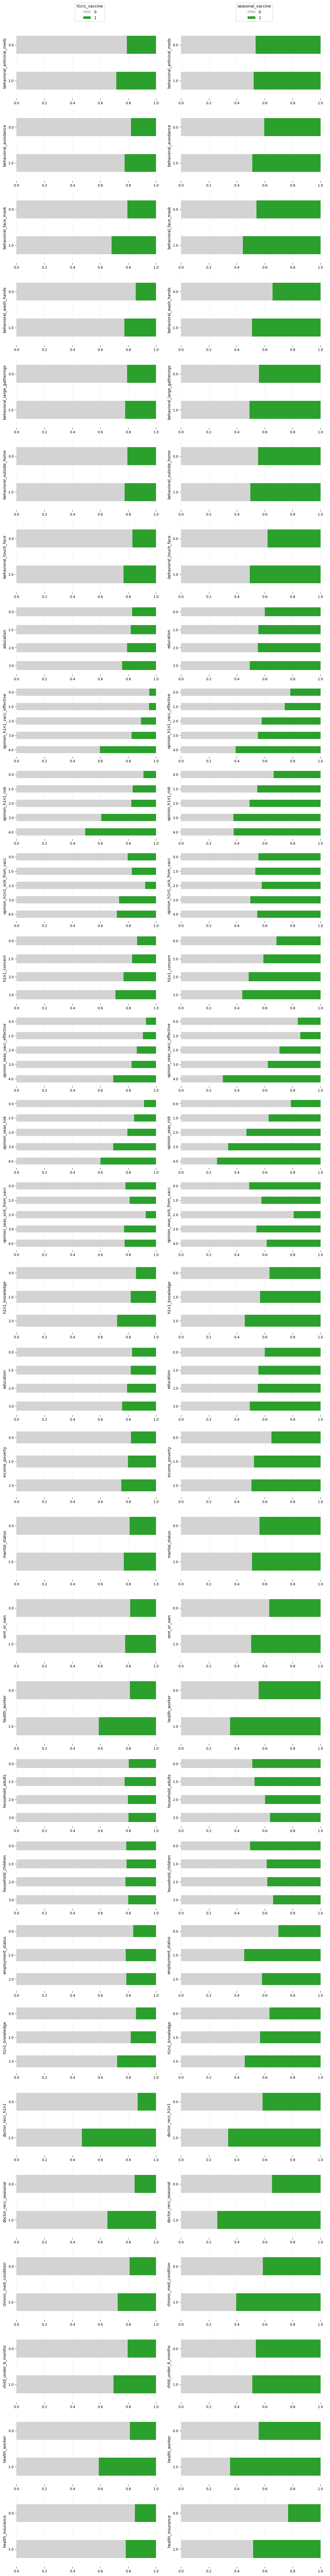

In [23]:
# Create a figure with subplots for each column in `cols_to_plot`
fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(12,len(cols_to_plot)*3)
)

# For each column in `cols_to_plot`, create a stacked bar chart of vaccination rate for `h1n1_vaccine` and `seasonal_vaccine`
for idx, col in enumerate(cols_to_plot):
    # Plot the vaccination rate for `h1n1_vaccine` and seasonal_vaccine` against the current column in the left subplot
    vaccination_rate_plot(
        col, 'h1n1_vaccine', df_ready, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', df_ready, ax=ax[idx, 1]
    )
    
# Set legend titles and positions for the subplots
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)

# Adjust the spacing between subplots
fig.tight_layout()

## 3.5 Handling Imbalanced Data

**Check label dataset**

In [24]:
# Define a function that creates a figure with two subplots 
# displaying the distribution of two columns in a given dataset.

def percentage_distribution(data, col1, col2):
    
    # Create a figure with 1 row and 2 columns, each with a size of (12, 4.5) inches
    fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))
    
    # Iterate over the two columns and create a bar plot for each column
    for i, col in enumerate([col1, col2]):
        
        # Calculate the percentage distribution of values in the column
        percentages = data[col].value_counts(normalize=True) * 100
        
        # Define the color of the bars
        colors = ['tab:red', 'tab:blue']
        
        # Create the bar plot for the column
        axs[i].bar(percentages.index, percentages, color=colors, width=0.5)
        
        # Set the title of the subplot to the name of the column and 'distribution'
        axs[i].set_title(f"{col} distribution \n (in percentage)")
        
        # Remove the x-axis and y-axis label
        axs[i].set_xlabel('')
        axs[i].set_ylabel("")
        
        # Set the y-axis limit to 0-100 and x-axis ticks to 0 and 1
        axs[i].set_ylim([0, 100])
        axs[i].set_xticks([0,1])
        
        # Set the x-axis tick labels to 'No' and 'Yes'
        axs[i].set_xticklabels(['No','Yes'], rotation=0)
        
        # Remove the y-axis tick labels
        axs[i].set_yticklabels('')
        
        # Disable grid lines
        axs[i].grid(False)
        
        # Add text labels showing the percentage value of each bar
        for j, percentage in enumerate(percentages):
            axs[i].text(j, percentage + 2, f"{percentage:.0f}%", ha='center', fontsize=10)
    
    # Display the plot
    plt.show()

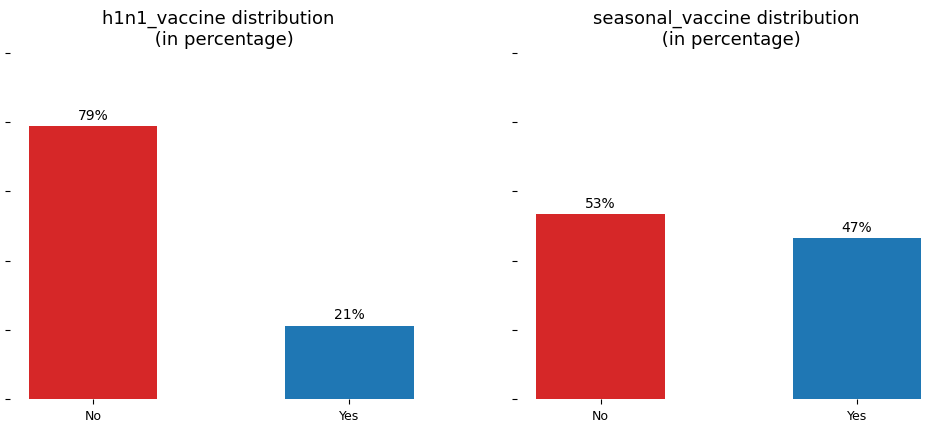

In [25]:
percentage_distribution(df_ready,'h1n1_vaccine','seasonal_vaccine') #perform the function

The label of `h1n1_vaccine` seems to be having imbalanced data with 78% and 21% comparison. On the other hand, the `seasonal_vaccine` seems to be balanced with no significant difference of the percentage

In [26]:
# Define X and y variables for machine learning models
X = df_ready.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1) # X contains all features except for respondent_id, h1n1_vaccine, and seasonal_vaccine columns
y = df_ready[['h1n1_vaccine', 'seasonal_vaccine']] # y contains h1n1_vaccine and seasonal_vaccine columns

### 3.5.1 ROS Methods

In [27]:
# Import RandomOverSampler from imblearn.over_sampling
from imblearn.over_sampling import RandomOverSampler

# Instantiate RandomOverSampler object with a random state of 0
ros = RandomOverSampler(random_state=0)

# Resample the features and target variables using RandomOverSampler for h1n1_vaccine and seasonal_vaccine separately
# Store the resampled features and target variables in separate variables
X_resampled_ros1, y_resampled_ros1 = ros.fit_resample(X, y.h1n1_vaccine)
X_resampled_ros2, y_resampled_ros2 = ros.fit_resample(X, y.seasonal_vaccine)

### 3.5.2 SMOTE Method

To make SMOTE method works, we should transform any categorical variables first. Then after that, we can simply mapping back into the original values to be analysed further

In [29]:
race_mapping = {'White': 0, 'Black': 1, 'Other or Multiple': 2, 'Hispanic': 3}

hhs_geo_mapping = {'oxchjgsf': 0, 'bhuqouqj': 1, 'qufhixun': 2, 'lrircsnp': 3, 
               'atmpeygn': 4, 'lzgpxyit': 5, 'fpwskwrf': 6, 'mlyzmhmf': 7,
               'dqpwygqj': 8, 'kbazzjca': 9}

X['race'] = X['race'].map(race_mapping)
X['hhs_geo_region'] =X['hhs_geo_region'].map(hhs_geo_mapping)

In [31]:
# Import the SMOTE module from the imblearn package
from imblearn.over_sampling import SMOTE

# Instantiate a SMOTE object with a fixed random state
smote = SMOTE(random_state=0)

# Apply SMOTE to resample the data for the `h1n1_vaccine` and  `seasonal_vaccine` targets
X_resampled_smote1, y_resampled_smote1 = smote.fit_resample(X, y.h1n1_vaccine)
X_resampled_smote2, y_resampled_smote2 = smote.fit_resample(X, y.seasonal_vaccine)

In [32]:
# mapping back
# Dictionary to map back race categories
race_mapping_back = {0: 'White', 1: 'Black', 2: 'Other or Multiple', 3: 'Hispanic'}

# Dictionary to map back HHS geographic regions
hhs_geo_mapping_back = {0: 'oxchjgsf', 1: 'bhuqouqj', 2: 'qufhixun', 3: 'lrircsnp', 
                        4: 'atmpeygn', 5: 'lzgpxyit', 6: 'fpwskwrf', 7: 'mlyzmhmf',
                        8: 'dqpwygqj', 9: 'kbazzjca'}

for mapback, col in zip([race_mapping_back, hhs_geo_mapping_back], ['race','hhs_geo_region']):
    X_resampled_smote1[col] = X_resampled_smote1[col].map(mapback)
    X_resampled_smote2[col] = X_resampled_smote2[col].map(mapback)

# 4. Cross-Validation

In [33]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

lgbm = LGBMClassifier(random_state=0)
catboost = CatBoostClassifier(random_state=0, verbose=False)

In [34]:
# Cross-validation function
def cv(train1, val1, train2, val2, model):
    y_pred1 = cross_val_predict(model, pd.get_dummies(train1, ['race','hhs_greo_region']), val1, cv=5, method='predict_proba')
    y_pred2 = cross_val_predict(model, pd.get_dummies(train2, ['race','hhs_greo_region']), val2, cv=5, method='predict_proba')
    y_pred1 = y_pred1[:, 1]  # use probabilities of the positive class only
    y_pred2 = y_pred2[:, 1]  # use probabilities of the positive class only
    roc_auc1 = roc_auc_score(val1, y_pred1)
    roc_auc2 = roc_auc_score(val2, y_pred2)
    roc_score = pd.DataFrame([roc_auc1,roc_auc2, (roc_auc1+roc_auc2)/2]).T.rename({0:'roc_h1n1_vaccine',1:'roc_seasonal_vaccine',2:'avg_the_two'}, axis=1)
    return roc_score

In [35]:
lgbm_output_train_cv_ros = cv(X_resampled_ros1, y_resampled_ros1, X_resampled_ros2, y_resampled_ros2, lgbm)
catboost_output_train_cv_ros = cv(X_resampled_ros1, y_resampled_ros1, X_resampled_ros2, y_resampled_ros2, catboost)

In [36]:
lgbm_output_train_cv_smote = cv(X_resampled_smote1, y_resampled_smote1, X_resampled_smote2, y_resampled_smote2, lgbm)
catboost_output_train_cv_smote = cv(X_resampled_smote1, y_resampled_smote1, X_resampled_smote2, y_resampled_smote2, catboost)

In [37]:
all_output_ros = pd.concat([lgbm_output_train_cv_ros, catboost_output_train_cv_ros])
all_output_ros.index = ['LGBM', 'CatBoost']
all_output_ros

,roc_h1n1_vaccine,roc_seasonal_vaccine,avg_the_two
LGBM,0.875116,0.860769,0.867942
CatBoost,0.912649,0.865293,0.888971


In [38]:
all_output_smote = pd.concat([lgbm_output_train_cv_smote, catboost_output_train_cv_smote])
all_output_smote.index = ['LGBM', 'CatBoost']
all_output_smote

,roc_h1n1_vaccine,roc_seasonal_vaccine,avg_the_two
LGBM,0.922914,0.861528,0.892221
CatBoost,0.922008,0.859966,0.890987


The results of SMOTE seem to be better. Hence, we will use the resampled SMOTE dataset for ruther analysis

## CV for Stacked Models

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

def stacked_cv(X, y, n_folds=5):
    # Initialize array to store predictions from each fold
    stacked_preds = np.zeros((len(X), 2))

    # Define LGBM and CatBoost models
    lgbm = LGBMClassifier(random_state=0)
    catboost = CatBoostClassifier(verbose=1000,random_state=0)

    # Define stratified cross-validation
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)

    # Loop over each fold
    for train_index, val_index in skf.split(X, y):
        # Split data into training and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train LGBM model on the training set
        lgbm.fit(X_train, y_train)

        # Get LGBM predictions on the validation set
        lgbm_preds = lgbm.predict_proba(X_val)

        # Train CatBoost model on the training set
        catboost.fit(X_train, y_train)

        # Get CatBoost predictions on the validation set
        catboost_preds = catboost.predict_proba(X_val)

        # Combine LGBM and CatBoost predictions into a single array
        fold_preds = np.column_stack((lgbm_preds[:, 1], catboost_preds[:, 1]))

        # Store predictions from current fold
        stacked_preds[val_index] = fold_preds

    # Train a meta-classifier on the stacked predictions
    meta_classifier = LGBMClassifier(random_state=0)
    meta_classifier.fit(stacked_preds, y)

    # Compute cross-validation ROC-AUC score
    cv_score = roc_auc_score(y, stacked_preds[:, 1])

    return meta_classifier, cv_score

In [47]:
stacked_cv_h1n1 = stacked_cv(pd.get_dummies(X_resampled_smote1,['race','hhs_geo_region']), y_resampled_smote1)
stacked_cv_seasonal = stacked_cv(pd.get_dummies(X_resampled_smote2,['race','hhs_geo_region']), y_resampled_smote2)

Learning rate set to 0.046235
0:	learn: 0.6544457	total: 14.1ms	remaining: 14.1s
999:	learn: 0.1716966	total: 13.9s	remaining: 0us
Learning rate set to 0.046235
0:	learn: 0.6546157	total: 15.4ms	remaining: 15.4s
999:	learn: 0.1717965	total: 13.5s	remaining: 0us
Learning rate set to 0.046235
0:	learn: 0.6545989	total: 14.2ms	remaining: 14.2s
999:	learn: 0.1753838	total: 13.9s	remaining: 0us
Learning rate set to 0.046235
0:	learn: 0.6549284	total: 13.7ms	remaining: 13.7s
999:	learn: 0.1764443	total: 13.3s	remaining: 0us
Learning rate set to 0.046235
0:	learn: 0.6547975	total: 13.6ms	remaining: 13.5s
999:	learn: 0.1736943	total: 14s	remaining: 0us
Learning rate set to 0.039179
0:	learn: 0.6764579	total: 12.3ms	remaining: 12.3s
999:	learn: 0.3445910	total: 10.9s	remaining: 0us
Learning rate set to 0.039179
0:	learn: 0.6764631	total: 11.7ms	remaining: 11.6s
999:	learn: 0.3465394	total: 11s	remaining: 0us
Learning rate set to 0.039179
0:	learn: 0.6761653	total: 12.4ms	remaining: 12.3s
999:	l

In [48]:
output_stacked_cv = pd.DataFrame([stacked_cv_h1n1[1], stacked_cv_seasonal[1], (stacked_cv_seasonal[1]+stacked_cv_h1n1[1])/2]).T.rename({0:'roc_h1n1_vaccine',1:'roc_seasonal_vaccine',2:'avg_the_two'}, axis=1)
output_stacked_cv

,roc_h1n1_vaccine,roc_seasonal_vaccine,avg_the_two
0,0.95553,0.874779,0.915154


The output gives us better score than only LGBM or CatBoost only

# 5. Modeling

## 5.1 Stacking the models

In [52]:
from sklearn.model_selection import train_test_split

def stacked_models_pred(X, y):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # Define LGBM and CatBoost models
    lgbm = LGBMClassifier(random_state=0)
    catboost = CatBoostClassifier(random_state=0, verbose=False)

    # Train LGBM model on the training set
    lgbm.fit(X_train, y_train)

    # Get LGBM predictions on the test set
    lgbm_preds = lgbm.predict_proba(X_test)

    # Train CatBoost model on the training set
    catboost.fit(X_train, y_train)

    # Get CatBoost predictions on the test set
    catboost_preds = catboost.predict_proba(X_test)

    # Combine LGBM and CatBoost predictions into a single array
    stacked_preds = np.column_stack((lgbm_preds, catboost_preds))

    # Train a meta-classifier on the stacked predictions
    meta_classifier = LGBMClassifier(random_state=0)
    meta_classifier.fit(stacked_preds, y_test)

    # Get LGBM and CatBoost predictions on new, unseen data
    new_lgbm_preds = lgbm.predict_proba(pd.get_dummies(test_new, ['race','hhs_greo_region']).drop('respondent_id',axis=1))
    new_catboost_preds = catboost.predict_proba(pd.get_dummies(test_new, ['race','hhs_greo_region']).drop('respondent_id',axis=1))

    # Combine LGBM and CatBoost predictions into a single array
    new_stacked_preds = np.column_stack((new_lgbm_preds, new_catboost_preds))

    # Get final predictions on new data using the meta-classifier
    final_preds = meta_classifier.predict_proba(new_stacked_preds)

    return final_preds

In [53]:
results_stacked1 = stacked_models_pred(pd.get_dummies(X_resampled_smote1, ['race','hhs_greo_region']), y_resampled_smote1)
results_stacked2 = stacked_models_pred(pd.get_dummies(X_resampled_smote2, ['race','hhs_greo_region']), y_resampled_smote2)

In [54]:
final_output_stacked_model = pd.DataFrame([test_new.respondent_id, results_stacked1[:,1], results_stacked2[:,1]]).T.rename({'Unnamed 0':'h1n1_vaccine',
                                                                                               'Unnamed 1':'seasonal_vaccine'
                                                                                              },axis=1)
final_output_stacked_model['respondent_id'] = final_output_stacked_model['respondent_id'].astype(int)
final_output_stacked_model.to_csv('final_output_stacked_model_resampled_smote.csv', index=False)

In [ ]:
def predict(model):
    model1.fit(X, y.h1n1_vaccine)
    y_pred1 = mode.predict_proba(test_new.drop('respondent_id',axis=1))
    model2.fit(X, y.seasonal_vaccine)
    y_pred2 = mode.predict_proba(test_new.drop('respondent_id',axis=1))
    output = pd.concat([submission.respondent_id, pd.DataFrame([y_pred1[:,1], y_pred2[:,1]]).T],axis=1).rename({0:'h1n1_vaccine',1:'seasonal_vaccine'},axis=1)
    return output

In [ ]:
def predict_resampled(model):
    model.fit(X_resampled1, y_resampled1)
    y_pred1 = model.predict_proba(pd.get_dummies(test_new, ['race','hhs_greo_region']).drop('respondent_id',axis=1))
    model.fit(X_resampled2, y_resampled2)
    y_pred2 = model.predict_proba(pd.get_dummies(test_new, ['race','hhs_greo_region']).drop('respondent_id',axis=1))
    output = pd.concat([submission.respondent_id, pd.DataFrame([y_pred1[:,1], y_pred2[:,1]]).T],axis=1).rename({0:'h1n1_vaccine',1:'seasonal_vaccine'},axis=1)
    return output

# 6. Hyperparameter Tuning

In [75]:
!pip install optuna

In [80]:
lgbm_tuned = LGBMClassifier(**best_params)

In [81]:
lgbm_output_train_cv_smote = cv(X_resampled_smote1, y_resampled_smote1, X_resampled_smote2, y_resampled_smote2, lgbm_tuned)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_frac

In [82]:
lgbm_output_train_cv_smote

,roc_h1n1_vaccine,roc_seasonal_vaccine,avg_the_two
0,0.908768,0.853935,0.881352


In [78]:
import numpy as np
import optuna.integration.lightgbm as lgb

from lightgbm import early_stopping
from lightgbm import log_evaluation
import sklearn.datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


if __name__ == "__main__":
    data, target = pd.get_dummies(X_resampled_smote1, ['race','hhs_greo_region']), y_resampled_smote1
    train_x, val_x, train_y, val_y = train_test_split(data, target, test_size=0.25, random_state=0)
    dtrain = lgb.Dataset(train_x, label=train_y)
    dval = lgb.Dataset(val_x, label=val_y)

    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
    }

    model = lgb.train(
        params,
        dtrain,
        valid_sets=[dtrain, dval],
        callbacks=[early_stopping(100), log_evaluation(100)],
    )

    prediction = np.rint(model.predict(val_x, num_iteration=model.best_iteration))
    roc_score = roc_auc_score(val_y, prediction)

    best_params = model.params
    print("Best params:", best_params)
    print("  ROC AUC Score = {}".format(roc_score))
    print("  Params: ")
    for key, value in best_params.items():
        print("    {}: {}".format(key, value))

[I 2023-05-10 13:25:28,774] A new study created in memory with name: no-name-239ee6cf-7c03-499e-86bf-06acd17e1a38

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.217562	valid_1's binary_logloss: 0.241516
[200]	valid_0's binary_logloss: 0.184931	valid_1's binary_logloss: 0.239605



feature_fraction, val_score: 0.239455:  14%|#4        | 1/7 [00:03<00:19,  3.28s/it][I 2023-05-10 13:25:32,068] Trial 0 finished with value: 0.23945519152925596 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 0 with value: 0.23945519152925596.

feature_fraction, val_score: 0.239455:  14%|#4        | 1/7 [00:03<00:19,  3.28s/it]

Early stopping, best iteration is:
[177]	valid_0's binary_logloss: 0.19142	valid_1's binary_logloss: 0.239455
[100]	valid_0's binary_logloss: 0.219646	valid_1's binary_logloss: 0.239842
[200]	valid_0's binary_logloss: 0.19109	valid_1's binary_logloss: 0.237678
[300]	valid_0's binary_logloss: 0.169578	valid_1's binary_logloss: 0.237415



feature_fraction, val_score: 0.237151:  29%|##8       | 2/7 [00:07<00:20,  4.02s/it][I 2023-05-10 13:25:36,607] Trial 1 finished with value: 0.23715069305640116 and parameters: {'feature_fraction': 0.6}. Best is trial 1 with value: 0.23715069305640116.

feature_fraction, val_score: 0.237151:  29%|##8       | 2/7 [00:07<00:20,  4.02s/it]

Early stopping, best iteration is:
[248]	valid_0's binary_logloss: 0.180062	valid_1's binary_logloss: 0.237151
[100]	valid_0's binary_logloss: 0.223207	valid_1's binary_logloss: 0.239967
[200]	valid_0's binary_logloss: 0.197079	valid_1's binary_logloss: 0.237911
[300]	valid_0's binary_logloss: 0.177588	valid_1's binary_logloss: 0.23915



feature_fraction, val_score: 0.237151:  43%|####2     | 3/7 [00:12<00:16,  4.25s/it][I 2023-05-10 13:25:41,121] Trial 2 finished with value: 0.23715069305640116 and parameters: {'feature_fraction': 0.4}. Best is trial 1 with value: 0.23715069305640116.

feature_fraction, val_score: 0.237151:  43%|####2     | 3/7 [00:12<00:16,  4.25s/it]

Early stopping, best iteration is:
[248]	valid_0's binary_logloss: 0.180062	valid_1's binary_logloss: 0.237151
[100]	valid_0's binary_logloss: 0.220918	valid_1's binary_logloss: 0.239534
[200]	valid_0's binary_logloss: 0.19349	valid_1's binary_logloss: 0.236426
[300]	valid_0's binary_logloss: 0.173312	valid_1's binary_logloss: 0.236286



feature_fraction, val_score: 0.235877:  57%|#####7    | 4/7 [00:17<00:13,  4.64s/it][I 2023-05-10 13:25:46,375] Trial 3 finished with value: 0.23587725131197085 and parameters: {'feature_fraction': 0.5}. Best is trial 3 with value: 0.23587725131197085.


[400]	valid_0's binary_logloss: 0.155262	valid_1's binary_logloss: 0.236759
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



feature_fraction, val_score: 0.235877:  57%|#####7    | 4/7 [00:17<00:13,  4.64s/it]

[100]	valid_0's binary_logloss: 0.218513	valid_1's binary_logloss: 0.238859
[200]	valid_0's binary_logloss: 0.189114	valid_1's binary_logloss: 0.236426
[300]	valid_0's binary_logloss: 0.166853	valid_1's binary_logloss: 0.237655



feature_fraction, val_score: 0.235877:  71%|#######1  | 5/7 [00:22<00:09,  4.88s/it][I 2023-05-10 13:25:51,679] Trial 4 finished with value: 0.23587725131197085 and parameters: {'feature_fraction': 0.7}. Best is trial 3 with value: 0.23587725131197085.

feature_fraction, val_score: 0.235877:  71%|#######1  | 5/7 [00:22<00:09,  4.88s/it]

[400]	valid_0's binary_logloss: 0.148397	valid_1's binary_logloss: 0.239408
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.216125	valid_1's binary_logloss: 0.239946
[200]	valid_0's binary_logloss: 0.183955	valid_1's binary_logloss: 0.237792
[300]	valid_0's binary_logloss: 0.161072	valid_1's binary_logloss: 0.239235



feature_fraction, val_score: 0.235877:  86%|########5 | 6/7 [00:27<00:04,  4.87s/it][I 2023-05-10 13:25:56,537] Trial 5 finished with value: 0.23587725131197085 and parameters: {'feature_fraction': 1.0}. Best is trial 3 with value: 0.23587725131197085.

feature_fraction, val_score: 0.235877:  86%|########5 | 6/7 [00:27<00:04,  4.87s/it]

[400]	valid_0's binary_logloss: 0.142827	valid_1's binary_logloss: 0.242319
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.217455	valid_1's binary_logloss: 0.239613
[200]	valid_0's binary_logloss: 0.186455	valid_1's binary_logloss: 0.23821
[300]	valid_0's binary_logloss: 0.163368	valid_1's binary_logloss: 0.239633



feature_fraction, val_score: 0.235877: 100%|##########| 7/7 [00:33<00:00,  4.78s/it]


[400]	valid_0's binary_logloss: 0.145407	valid_1's binary_logloss: 0.242272
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	valid_0's binary_logloss: 0.120017	valid_1's binary_logloss: 0.239473
[200]	valid_0's binary_logloss: 0.0663151	valid_1's binary_logloss: 0.251629
[300]	valid_0's binary_logloss: 0.0387293	valid_1's binary_logloss: 0.26742
[400]	valid_0's binary_logloss: 0.0223311	valid_1's binary_logloss: 0.286079
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:   5%|5         | 1/20 [00:22<07:02, 22.23s/it][I 2023-05-10 13:26:24,462] Trial 7 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 207}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:   5%|5         | 1/20 [00:22<07:02, 22.23s/it]

[100]	valid_0's binary_logloss: 0.110894	valid_1's binary_logloss: 0.241223
[200]	valid_0's binary_logloss: 0.0559176	valid_1's binary_logloss: 0.254882
[300]	valid_0's binary_logloss: 0.0316348	valid_1's binary_logloss: 0.272733
[400]	valid_0's binary_logloss: 0.0176272	valid_1's binary_logloss: 0.293634
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:  10%|#         | 2/20 [00:48<07:23, 24.65s/it][I 2023-05-10 13:26:50,810] Trial 8 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 233}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  10%|#         | 2/20 [00:48<07:23, 24.65s/it]

[100]	valid_0's binary_logloss: 0.123794	valid_1's binary_logloss: 0.241573
[200]	valid_0's binary_logloss: 0.0700672	valid_1's binary_logloss: 0.251553
[300]	valid_0's binary_logloss: 0.0420267	valid_1's binary_logloss: 0.266596
[400]	valid_0's binary_logloss: 0.0254941	valid_1's binary_logloss: 0.2837
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:  15%|#5        | 3/20 [01:10<06:34, 23.20s/it][I 2023-05-10 13:27:12,291] Trial 9 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 194}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  15%|#5        | 3/20 [01:10<06:34, 23.20s/it]

[100]	valid_0's binary_logloss: 0.140514	valid_1's binary_logloss: 0.239558
[200]	valid_0's binary_logloss: 0.0888137	valid_1's binary_logloss: 0.247038
[300]	valid_0's binary_logloss: 0.0579096	valid_1's binary_logloss: 0.257548
[400]	valid_0's binary_logloss: 0.0389278	valid_1's binary_logloss: 0.271164



num_leaves, val_score: 0.235877:  20%|##        | 4/20 [01:27<05:32, 20.79s/it][I 2023-05-10 13:27:29,378] Trial 10 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 155}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  20%|##        | 4/20 [01:27<05:32, 20.79s/it]

Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.141207	valid_1's binary_logloss: 0.239461
[200]	valid_0's binary_logloss: 0.0889338	valid_1's binary_logloss: 0.245878
[300]	valid_0's binary_logloss: 0.059483	valid_1's binary_logloss: 0.256272
[400]	valid_0's binary_logloss: 0.04022	valid_1's binary_logloss: 0.269419



num_leaves, val_score: 0.235877:  25%|##5       | 5/20 [01:44<04:54, 19.64s/it][I 2023-05-10 13:27:46,975] Trial 11 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 152}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  25%|##5       | 5/20 [01:44<04:54, 19.64s/it]

Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.157365	valid_1's binary_logloss: 0.237829
[200]	valid_0's binary_logloss: 0.109627	valid_1's binary_logloss: 0.242268
[300]	valid_0's binary_logloss: 0.0787947	valid_1's binary_logloss: 0.249666
[400]	valid_0's binary_logloss: 0.0568707	valid_1's binary_logloss: 0.258768



num_leaves, val_score: 0.235877:  30%|###       | 6/20 [01:58<04:07, 17.65s/it][I 2023-05-10 13:28:00,769] Trial 12 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 120}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  30%|###       | 6/20 [01:58<04:07, 17.65s/it]

Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.230198	valid_1's binary_logloss: 0.240798
[200]	valid_0's binary_logloss: 0.206347	valid_1's binary_logloss: 0.2375
[300]	valid_0's binary_logloss: 0.189139	valid_1's binary_logloss: 0.236829



num_leaves, val_score: 0.235877:  35%|###5      | 7/20 [02:02<02:53, 13.31s/it][I 2023-05-10 13:28:05,139] Trial 13 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 22}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  35%|###5      | 7/20 [02:02<02:53, 13.31s/it]

[400]	valid_0's binary_logloss: 0.17518	valid_1's binary_logloss: 0.237707
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.105807	valid_1's binary_logloss: 0.242127
[200]	valid_0's binary_logloss: 0.0514786	valid_1's binary_logloss: 0.256393
[300]	valid_0's binary_logloss: 0.0272496	valid_1's binary_logloss: 0.277692
[400]	valid_0's binary_logloss: 0.0140437	valid_1's binary_logloss: 0.302253
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:  40%|####      | 8/20 [02:29<03:30, 17.57s/it][I 2023-05-10 13:28:31,845] Trial 14 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 251}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  40%|####      | 8/20 [02:29<03:30, 17.57s/it]

[100]	valid_0's binary_logloss: 0.120974	valid_1's binary_logloss: 0.242015
[200]	valid_0's binary_logloss: 0.0664709	valid_1's binary_logloss: 0.254338
[300]	valid_0's binary_logloss: 0.0384469	valid_1's binary_logloss: 0.270372
[400]	valid_0's binary_logloss: 0.0233823	valid_1's binary_logloss: 0.288288
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:  45%|####5     | 9/20 [02:52<03:30, 19.15s/it][I 2023-05-10 13:28:54,452] Trial 15 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 204}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  45%|####5     | 9/20 [02:52<03:30, 19.15s/it]

[100]	valid_0's binary_logloss: 0.198989	valid_1's binary_logloss: 0.238422
[200]	valid_0's binary_logloss: 0.164297	valid_1's binary_logloss: 0.239081
[300]	valid_0's binary_logloss: 0.137859	valid_1's binary_logloss: 0.241629
[400]	valid_0's binary_logloss: 0.117073	valid_1's binary_logloss: 0.244998



num_leaves, val_score: 0.235877:  50%|#####     | 10/20 [02:59<02:35, 15.59s/it][I 2023-05-10 13:29:02,080] Trial 16 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 55}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  50%|#####     | 10/20 [02:59<02:35, 15.59s/it]

Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.170857	valid_1's binary_logloss: 0.239111
[200]	valid_0's binary_logloss: 0.124741	valid_1's binary_logloss: 0.243033
[300]	valid_0's binary_logloss: 0.0948962	valid_1's binary_logloss: 0.25001
[400]	valid_0's binary_logloss: 0.0728665	valid_1's binary_logloss: 0.256875



num_leaves, val_score: 0.235877:  55%|#####5    | 11/20 [03:12<02:11, 14.63s/it][I 2023-05-10 13:29:14,538] Trial 17 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 96}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  55%|#####5    | 11/20 [03:12<02:11, 14.63s/it]

Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.104491	valid_1's binary_logloss: 0.241576
[200]	valid_0's binary_logloss: 0.0504246	valid_1's binary_logloss: 0.256849
[300]	valid_0's binary_logloss: 0.0262229	valid_1's binary_logloss: 0.279677
[400]	valid_0's binary_logloss: 0.0136819	valid_1's binary_logloss: 0.305369
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:  60%|######    | 12/20 [03:38<02:25, 18.17s/it][I 2023-05-10 13:29:40,814] Trial 18 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 256}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  60%|######    | 12/20 [03:38<02:25, 18.17s/it]

[100]	valid_0's binary_logloss: 0.120017	valid_1's binary_logloss: 0.239473
[200]	valid_0's binary_logloss: 0.0663151	valid_1's binary_logloss: 0.251629
[300]	valid_0's binary_logloss: 0.0387293	valid_1's binary_logloss: 0.26742
[400]	valid_0's binary_logloss: 0.0223311	valid_1's binary_logloss: 0.286079
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:  65%|######5   | 13/20 [04:01<02:17, 19.63s/it][I 2023-05-10 13:30:03,789] Trial 19 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 207}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  65%|######5   | 13/20 [04:01<02:17, 19.63s/it]

[100]	valid_0's binary_logloss: 0.116058	valid_1's binary_logloss: 0.240725
[200]	valid_0's binary_logloss: 0.0611382	valid_1's binary_logloss: 0.252807
[300]	valid_0's binary_logloss: 0.0354214	valid_1's binary_logloss: 0.269659
[400]	valid_0's binary_logloss: 0.020863	valid_1's binary_logloss: 0.288257
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:  70%|#######   | 14/20 [04:25<02:05, 20.90s/it][I 2023-05-10 13:30:27,635] Trial 20 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 218}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  70%|#######   | 14/20 [04:25<02:05, 20.90s/it]

[100]	valid_0's binary_logloss: 0.133595	valid_1's binary_logloss: 0.239988
[200]	valid_0's binary_logloss: 0.0798005	valid_1's binary_logloss: 0.249157
[300]	valid_0's binary_logloss: 0.0504294	valid_1's binary_logloss: 0.261863
[400]	valid_0's binary_logloss: 0.0335763	valid_1's binary_logloss: 0.276224



num_leaves, val_score: 0.235877:  75%|#######5  | 15/20 [04:44<01:42, 20.44s/it][I 2023-05-10 13:30:47,007] Trial 21 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 171}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  75%|#######5  | 15/20 [04:44<01:42, 20.44s/it]

Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.111943	valid_1's binary_logloss: 0.241238
[200]	valid_0's binary_logloss: 0.0572322	valid_1's binary_logloss: 0.253732
[300]	valid_0's binary_logloss: 0.0314531	valid_1's binary_logloss: 0.272745
[400]	valid_0's binary_logloss: 0.0175935	valid_1's binary_logloss: 0.29559
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:  80%|########  | 16/20 [05:08<01:25, 21.48s/it][I 2023-05-10 13:31:10,896] Trial 22 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 230}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  80%|########  | 16/20 [05:08<01:25, 21.48s/it]

[100]	valid_0's binary_logloss: 0.127579	valid_1's binary_logloss: 0.238781
[200]	valid_0's binary_logloss: 0.0740373	valid_1's binary_logloss: 0.249658
[300]	valid_0's binary_logloss: 0.0463167	valid_1's binary_logloss: 0.263931
[400]	valid_0's binary_logloss: 0.0288059	valid_1's binary_logloss: 0.278849
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:  85%|########5 | 17/20 [05:30<01:04, 21.44s/it][I 2023-05-10 13:31:32,256] Trial 23 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 185}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  85%|########5 | 17/20 [05:30<01:04, 21.44s/it]

[100]	valid_0's binary_logloss: 0.154421	valid_1's binary_logloss: 0.237321
[200]	valid_0's binary_logloss: 0.104922	valid_1's binary_logloss: 0.243509
[300]	valid_0's binary_logloss: 0.0744669	valid_1's binary_logloss: 0.252292
[400]	valid_0's binary_logloss: 0.0527376	valid_1's binary_logloss: 0.260952
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:  90%|######### | 18/20 [05:46<00:39, 19.89s/it][I 2023-05-10 13:31:48,536] Trial 24 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 126}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  90%|######### | 18/20 [05:46<00:39, 19.89s/it]

[100]	valid_0's binary_logloss: 0.111695	valid_1's binary_logloss: 0.241665
[200]	valid_0's binary_logloss: 0.0574611	valid_1's binary_logloss: 0.254449
[300]	valid_0's binary_logloss: 0.0325349	valid_1's binary_logloss: 0.274492
[400]	valid_0's binary_logloss: 0.0185402	valid_1's binary_logloss: 0.296009
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



num_leaves, val_score: 0.235877:  95%|#########5| 19/20 [06:10<00:21, 21.33s/it][I 2023-05-10 13:32:13,209] Trial 25 finished with value: 0.23587725131197085 and parameters: {'num_leaves': 232}. Best is trial 7 with value: 0.23587725131197085.

num_leaves, val_score: 0.235877:  95%|#########5| 19/20 [06:10<00:21, 21.33s/it]

[100]	valid_0's binary_logloss: 0.178151	valid_1's binary_logloss: 0.238125
[200]	valid_0's binary_logloss: 0.135248	valid_1's binary_logloss: 0.241285
[300]	valid_0's binary_logloss: 0.107229	valid_1's binary_logloss: 0.245157
[400]	valid_0's binary_logloss: 0.0851165	valid_1's binary_logloss: 0.2513



num_leaves, val_score: 0.235877: 100%|##########| 20/20 [06:22<00:00, 19.11s/it]


Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



bagging, val_score: 0.235877:   0%|          | 0/10 [00:00<?, ?it/s]

[100]	valid_0's binary_logloss: 0.219679	valid_1's binary_logloss: 0.239129
[200]	valid_0's binary_logloss: 0.192554	valid_1's binary_logloss: 0.236981
[300]	valid_0's binary_logloss: 0.171839	valid_1's binary_logloss: 0.237648
[400]	valid_0's binary_logloss: 0.154455	valid_1's binary_logloss: 0.239442
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



bagging, val_score: 0.235877:  10%|#         | 1/10 [00:05<00:53,  5.95s/it][I 2023-05-10 13:32:30,370] Trial 27 finished with value: 0.23587725131197085 and parameters: {'bagging_fraction': 0.9938697422167876, 'bagging_freq': 2}. Best is trial 27 with value: 0.23587725131197085.

bagging, val_score: 0.235877:  10%|#         | 1/10 [00:05<00:53,  5.95s/it]

[100]	valid_0's binary_logloss: 0.220106	valid_1's binary_logloss: 0.239404
[200]	valid_0's binary_logloss: 0.190644	valid_1's binary_logloss: 0.237894
[300]	valid_0's binary_logloss: 0.168945	valid_1's binary_logloss: 0.240201
[400]	valid_0's binary_logloss: 0.150989	valid_1's binary_logloss: 0.243365



bagging, val_score: 0.235877:  20%|##        | 2/10 [00:11<00:46,  5.86s/it][I 2023-05-10 13:32:36,163] Trial 28 finished with value: 0.23587725131197085 and parameters: {'bagging_fraction': 0.7077033938515049, 'bagging_freq': 1}. Best is trial 27 with value: 0.23587725131197085.

bagging, val_score: 0.235877:  20%|##        | 2/10 [00:11<00:46,  5.86s/it]

Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.22047	valid_1's binary_logloss: 0.239169
[200]	valid_0's binary_logloss: 0.191985	valid_1's binary_logloss: 0.237216
[300]	valid_0's binary_logloss: 0.170906	valid_1's binary_logloss: 0.241137
[400]	valid_0's binary_logloss: 0.153383	valid_1's binary_logloss: 0.244726
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



bagging, val_score: 0.235877:  30%|###       | 3/10 [00:17<00:40,  5.78s/it][I 2023-05-10 13:32:41,851] Trial 29 finished with value: 0.23587725131197085 and parameters: {'bagging_fraction': 0.5231311569685684, 'bagging_freq': 4}. Best is trial 27 with value: 0.23587725131197085.

bagging, val_score: 0.235877:  30%|###       | 3/10 [00:17<00:40,  5.78s/it]

[100]	valid_0's binary_logloss: 0.219872	valid_1's binary_logloss: 0.23809
[200]	valid_0's binary_logloss: 0.190824	valid_1's binary_logloss: 0.237557
[300]	valid_0's binary_logloss: 0.168866	valid_1's binary_logloss: 0.239993
[400]	valid_0's binary_logloss: 0.15065	valid_1's binary_logloss: 0.242826
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



bagging, val_score: 0.235877:  40%|####      | 4/10 [00:23<00:34,  5.83s/it][I 2023-05-10 13:32:47,753] Trial 30 finished with value: 0.23587725131197085 and parameters: {'bagging_fraction': 0.6871613683783778, 'bagging_freq': 2}. Best is trial 27 with value: 0.23587725131197085.

bagging, val_score: 0.235877:  40%|####      | 4/10 [00:23<00:34,  5.83s/it]

[100]	valid_0's binary_logloss: 0.220259	valid_1's binary_logloss: 0.239012
[200]	valid_0's binary_logloss: 0.191455	valid_1's binary_logloss: 0.237393
[300]	valid_0's binary_logloss: 0.169476	valid_1's binary_logloss: 0.239975
[400]	valid_0's binary_logloss: 0.151568	valid_1's binary_logloss: 0.24254
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



bagging, val_score: 0.235877:  50%|#####     | 5/10 [00:29<00:30,  6.10s/it][I 2023-05-10 13:32:54,332] Trial 31 finished with value: 0.23587725131197085 and parameters: {'bagging_fraction': 0.697920822245183, 'bagging_freq': 6}. Best is trial 27 with value: 0.23587725131197085.

bagging, val_score: 0.235877:  50%|#####     | 5/10 [00:29<00:30,  6.10s/it]

[100]	valid_0's binary_logloss: 0.219779	valid_1's binary_logloss: 0.238473
[200]	valid_0's binary_logloss: 0.190851	valid_1's binary_logloss: 0.237593
[300]	valid_0's binary_logloss: 0.169025	valid_1's binary_logloss: 0.239042
[400]	valid_0's binary_logloss: 0.151175	valid_1's binary_logloss: 0.242657
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



bagging, val_score: 0.235877:  60%|######    | 6/10 [00:35<00:23,  5.96s/it][I 2023-05-10 13:33:00,014] Trial 32 finished with value: 0.23587725131197085 and parameters: {'bagging_fraction': 0.7243754409025291, 'bagging_freq': 6}. Best is trial 27 with value: 0.23587725131197085.

bagging, val_score: 0.235877:  60%|######    | 6/10 [00:35<00:23,  5.96s/it]

[100]	valid_0's binary_logloss: 0.220218	valid_1's binary_logloss: 0.239144
[200]	valid_0's binary_logloss: 0.191691	valid_1's binary_logloss: 0.237784
[300]	valid_0's binary_logloss: 0.169966	valid_1's binary_logloss: 0.238273
[400]	valid_0's binary_logloss: 0.152346	valid_1's binary_logloss: 0.240225
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



bagging, val_score: 0.235877:  70%|#######   | 7/10 [00:41<00:17,  5.84s/it][I 2023-05-10 13:33:05,602] Trial 33 finished with value: 0.23587725131197085 and parameters: {'bagging_fraction': 0.923134450517872, 'bagging_freq': 5}. Best is trial 27 with value: 0.23587725131197085.

bagging, val_score: 0.235877:  70%|#######   | 7/10 [00:41<00:17,  5.84s/it]

[100]	valid_0's binary_logloss: 0.219167	valid_1's binary_logloss: 0.239563
[200]	valid_0's binary_logloss: 0.189906	valid_1's binary_logloss: 0.237977
[300]	valid_0's binary_logloss: 0.168735	valid_1's binary_logloss: 0.240332
[400]	valid_0's binary_logloss: 0.150788	valid_1's binary_logloss: 0.243529
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



bagging, val_score: 0.235877:  80%|########  | 8/10 [00:46<00:11,  5.82s/it][I 2023-05-10 13:33:11,375] Trial 34 finished with value: 0.23587725131197085 and parameters: {'bagging_fraction': 0.5817823864859555, 'bagging_freq': 1}. Best is trial 27 with value: 0.23587725131197085.

bagging, val_score: 0.235877:  80%|########  | 8/10 [00:46<00:11,  5.82s/it]

[100]	valid_0's binary_logloss: 0.220002	valid_1's binary_logloss: 0.239014
[200]	valid_0's binary_logloss: 0.19093	valid_1's binary_logloss: 0.237999
[300]	valid_0's binary_logloss: 0.169212	valid_1's binary_logloss: 0.239928
[400]	valid_0's binary_logloss: 0.151615	valid_1's binary_logloss: 0.242432
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



bagging, val_score: 0.235877:  90%|######### | 9/10 [00:52<00:05,  5.76s/it][I 2023-05-10 13:33:17,026] Trial 35 finished with value: 0.23587725131197085 and parameters: {'bagging_fraction': 0.8558034696806189, 'bagging_freq': 4}. Best is trial 27 with value: 0.23587725131197085.

bagging, val_score: 0.235877:  90%|######### | 9/10 [00:52<00:05,  5.76s/it]

[100]	valid_0's binary_logloss: 0.219706	valid_1's binary_logloss: 0.239656
[200]	valid_0's binary_logloss: 0.19116	valid_1's binary_logloss: 0.238176
[300]	valid_0's binary_logloss: 0.169377	valid_1's binary_logloss: 0.239758
[400]	valid_0's binary_logloss: 0.151289	valid_1's binary_logloss: 0.241423



bagging, val_score: 0.235877: 100%|##########| 10/10 [00:59<00:00,  5.92s/it]


Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



feature_fraction_stage2, val_score: 0.235877:   0%|          | 0/6 [00:00<?, ?it/s]

[100]	valid_0's binary_logloss: 0.220927	valid_1's binary_logloss: 0.240111
[200]	valid_0's binary_logloss: 0.192882	valid_1's binary_logloss: 0.238612
[300]	valid_0's binary_logloss: 0.172459	valid_1's binary_logloss: 0.23897



feature_fraction_stage2, val_score: 0.235877:  17%|#6        | 1/6 [00:05<00:26,  5.38s/it][I 2023-05-10 13:33:28,980] Trial 37 finished with value: 0.23587725131197085 and parameters: {'feature_fraction': 0.484}. Best is trial 37 with value: 0.23587725131197085.

feature_fraction_stage2, val_score: 0.235877:  17%|#6        | 1/6 [00:05<00:26,  5.38s/it]

[400]	valid_0's binary_logloss: 0.155479	valid_1's binary_logloss: 0.240158
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.220279	valid_1's binary_logloss: 0.239526
[200]	valid_0's binary_logloss: 0.191614	valid_1's binary_logloss: 0.237509
[300]	valid_0's binary_logloss: 0.170443	valid_1's binary_logloss: 0.237973



feature_fraction_stage2, val_score: 0.235877:  33%|###3      | 2/6 [00:10<00:21,  5.40s/it][I 2023-05-10 13:33:34,397] Trial 38 finished with value: 0.23587725131197085 and parameters: {'feature_fraction': 0.58}. Best is trial 37 with value: 0.23587725131197085.

feature_fraction_stage2, val_score: 0.235877:  33%|###3      | 2/6 [00:10<00:21,  5.40s/it]

[400]	valid_0's binary_logloss: 0.153265	valid_1's binary_logloss: 0.24034
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.219988	valid_1's binary_logloss: 0.238749
[200]	valid_0's binary_logloss: 0.191901	valid_1's binary_logloss: 0.236887
[300]	valid_0's binary_logloss: 0.17028	valid_1's binary_logloss: 0.237108



feature_fraction_stage2, val_score: 0.235877:  50%|#####     | 3/6 [00:16<00:16,  5.44s/it][I 2023-05-10 13:33:39,877] Trial 39 finished with value: 0.23587725131197085 and parameters: {'feature_fraction': 0.5479999999999999}. Best is trial 37 with value: 0.23587725131197085.

feature_fraction_stage2, val_score: 0.235877:  50%|#####     | 3/6 [00:16<00:16,  5.44s/it]

[400]	valid_0's binary_logloss: 0.152333	valid_1's binary_logloss: 0.238586
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.222357	valid_1's binary_logloss: 0.239567
[200]	valid_0's binary_logloss: 0.194545	valid_1's binary_logloss: 0.237926
[300]	valid_0's binary_logloss: 0.174813	valid_1's binary_logloss: 0.238798



feature_fraction_stage2, val_score: 0.235877:  50%|#####     | 3/6 [00:21<00:16,  5.44s/it]

[400]	valid_0's binary_logloss: 0.157853	valid_1's binary_logloss: 0.239595
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



feature_fraction_stage2, val_score: 0.235877:  67%|######6   | 4/6 [00:21<00:10,  5.47s/it][I 2023-05-10 13:33:45,405] Trial 40 finished with value: 0.23587725131197085 and parameters: {'feature_fraction': 0.45199999999999996}. Best is trial 37 with value: 0.23587725131197085.

feature_fraction_stage2, val_score: 0.235877:  67%|######6   | 4/6 [00:21<00:10,  5.47s/it]

[100]	valid_0's binary_logloss: 0.220918	valid_1's binary_logloss: 0.239534
[200]	valid_0's binary_logloss: 0.19349	valid_1's binary_logloss: 0.236426
[300]	valid_0's binary_logloss: 0.173312	valid_1's binary_logloss: 0.236286



feature_fraction_stage2, val_score: 0.235877:  67%|######6   | 4/6 [00:27<00:10,  5.47s/it]

[400]	valid_0's binary_logloss: 0.155262	valid_1's binary_logloss: 0.236759
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



feature_fraction_stage2, val_score: 0.235877:  83%|########3 | 5/6 [00:27<00:05,  5.42s/it][I 2023-05-10 13:33:50,724] Trial 41 finished with value: 0.23587725131197085 and parameters: {'feature_fraction': 0.516}. Best is trial 37 with value: 0.23587725131197085.

feature_fraction_stage2, val_score: 0.235877:  83%|########3 | 5/6 [00:27<00:05,  5.42s/it]

[100]	valid_0's binary_logloss: 0.22287	valid_1's binary_logloss: 0.240219
[200]	valid_0's binary_logloss: 0.196381	valid_1's binary_logloss: 0.23729
[300]	valid_0's binary_logloss: 0.176684	valid_1's binary_logloss: 0.237759
[400]	valid_0's binary_logloss: 0.159428	valid_1's binary_logloss: 0.237987
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



feature_fraction_stage2, val_score: 0.235877: 100%|##########| 6/6 [00:33<00:00,  5.60s/it]

regularization_factors, val_score: 0.235877:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	valid_0's binary_logloss: 0.220918	valid_1's binary_logloss: 0.239534
[200]	valid_0's binary_logloss: 0.193355	valid_1's binary_logloss: 0.237022
[300]	valid_0's binary_logloss: 0.17202	valid_1's binary_logloss: 0.237398
[400]	valid_0's binary_logloss: 0.155568	valid_1's binary_logloss: 0.239484
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



regularization_factors, val_score: 0.235877:   5%|5         | 1/20 [00:05<01:43,  5.46s/it][I 2023-05-10 13:34:02,651] Trial 43 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 6.839411458691338e-06, 'lambda_l2': 7.333906913381886e-08}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:   5%|5         | 1/20 [00:05<01:43,  5.46s/it]

[100]	valid_0's binary_logloss: 0.220648	valid_1's binary_logloss: 0.238401
[200]	valid_0's binary_logloss: 0.192432	valid_1's binary_logloss: 0.236028
[300]	valid_0's binary_logloss: 0.172051	valid_1's binary_logloss: 0.23714



regularization_factors, val_score: 0.235877:  10%|#         | 2/20 [00:10<01:38,  5.46s/it]

[400]	valid_0's binary_logloss: 0.154983	valid_1's binary_logloss: 0.238024
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877


[I 2023-05-10 13:34:08,116] Trial 44 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 0.024068381272570046, 'lambda_l2': 0.0013093522554018641}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  10%|#         | 2/20 [00:10<01:38,  5.46s/it]

[100]	valid_0's binary_logloss: 0.2209	valid_1's binary_logloss: 0.24009
[200]	valid_0's binary_logloss: 0.192681	valid_1's binary_logloss: 0.237919
[300]	valid_0's binary_logloss: 0.171978	valid_1's binary_logloss: 0.23855



regularization_factors, val_score: 0.235877:  10%|#         | 2/20 [00:16<01:38,  5.46s/it]

[400]	valid_0's binary_logloss: 0.154614	valid_1's binary_logloss: 0.240426
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



regularization_factors, val_score: 0.235877:  15%|#5        | 3/20 [00:16<01:35,  5.60s/it][I 2023-05-10 13:34:13,888] Trial 45 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 0.0016935187320209829, 'lambda_l2': 9.236828476679432e-07}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  15%|#5        | 3/20 [00:16<01:35,  5.60s/it]

[100]	valid_0's binary_logloss: 0.221123	valid_1's binary_logloss: 0.238917
[200]	valid_0's binary_logloss: 0.193424	valid_1's binary_logloss: 0.237086
[300]	valid_0's binary_logloss: 0.172839	valid_1's binary_logloss: 0.237096



regularization_factors, val_score: 0.235877:  20%|##        | 4/20 [00:22<01:29,  5.58s/it][I 2023-05-10 13:34:19,425] Trial 46 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 0.048610133361234355, 'lambda_l2': 1.6325951913787152e-07}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  20%|##        | 4/20 [00:22<01:29,  5.58s/it]

[400]	valid_0's binary_logloss: 0.155418	valid_1's binary_logloss: 0.238822
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.22092	valid_1's binary_logloss: 0.239534
[200]	valid_0's binary_logloss: 0.193919	valid_1's binary_logloss: 0.237741
[300]	valid_0's binary_logloss: 0.171745	valid_1's binary_logloss: 0.238182



regularization_factors, val_score: 0.235877:  20%|##        | 4/20 [00:27<01:29,  5.58s/it]


[400]	valid_0's binary_logloss: 0.155038	valid_1's binary_logloss: 0.239797
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877


regularization_factors, val_score: 0.235877:  25%|##5       | 5/20 [00:27<01:22,  5.53s/it][I 2023-05-10 13:34:24,862] Trial 47 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 5.659509663491699e-08, 'lambda_l2': 0.00042797284913195685}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  25%|##5       | 5/20 [00:27<01:22,  5.53s/it]

[100]	valid_0's binary_logloss: 0.220918	valid_1's binary_logloss: 0.239534
[200]	valid_0's binary_logloss: 0.19349	valid_1's binary_logloss: 0.236426
[300]	valid_0's binary_logloss: 0.173092	valid_1's binary_logloss: 0.236402
[400]	valid_0's binary_logloss: 0.155233	valid_1's binary_logloss: 0.237724
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



regularization_factors, val_score: 0.235877:  30%|###       | 6/20 [00:34<01:22,  5.86s/it][I 2023-05-10 13:34:31,362] Trial 48 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 3.282723015332105e-08, 'lambda_l2': 1.574910423559253e-07}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  30%|###       | 6/20 [00:34<01:22,  5.86s/it]

[100]	valid_0's binary_logloss: 0.220921	valid_1's binary_logloss: 0.239535
[200]	valid_0's binary_logloss: 0.193323	valid_1's binary_logloss: 0.237135
[300]	valid_0's binary_logloss: 0.172883	valid_1's binary_logloss: 0.237559
[400]	valid_0's binary_logloss: 0.1554	valid_1's binary_logloss: 0.238888
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



regularization_factors, val_score: 0.235877:  35%|###5      | 7/20 [00:39<01:14,  5.74s/it][I 2023-05-10 13:34:36,859] Trial 49 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 1.6640912491532499e-06, 'lambda_l2': 0.0008782573999381392}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  35%|###5      | 7/20 [00:39<01:14,  5.74s/it]

[100]	valid_0's binary_logloss: 0.220823	valid_1's binary_logloss: 0.239546
[200]	valid_0's binary_logloss: 0.192983	valid_1's binary_logloss: 0.237067
[300]	valid_0's binary_logloss: 0.171821	valid_1's binary_logloss: 0.237224



regularization_factors, val_score: 0.235877:  35%|###5      | 7/20 [00:45<01:14,  5.74s/it]

[400]	valid_0's binary_logloss: 0.154422	valid_1's binary_logloss: 0.238416
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



regularization_factors, val_score: 0.235877:  40%|####      | 8/20 [00:45<01:08,  5.72s/it][I 2023-05-10 13:34:42,530] Trial 50 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 0.0009686717030547937, 'lambda_l2': 3.397092814407415e-05}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  40%|####      | 8/20 [00:45<01:08,  5.72s/it]

[100]	valid_0's binary_logloss: 0.220918	valid_1's binary_logloss: 0.239534
[200]	valid_0's binary_logloss: 0.193355	valid_1's binary_logloss: 0.237022
[300]	valid_0's binary_logloss: 0.172062	valid_1's binary_logloss: 0.237629


[400]	valid_0's binary_logloss: 0.154299	valid_1's binary_logloss: 0.239492
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877


regularization_factors, val_score: 0.235877:  45%|####5     | 9/20 [00:50<01:01,  5.62s/it][I 2023-05-10 13:34:47,927] Trial 51 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 1.2660149902688374e-05, 'lambda_l2': 7.411655889993543e-08}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  45%|####5     | 9/20 [00:50<01:01,  5.62s/it]

[100]	valid_0's binary_logloss: 0.220918	valid_1's binary_logloss: 0.239534
[200]	valid_0's binary_logloss: 0.193355	valid_1's binary_logloss: 0.237022
[300]	valid_0's binary_logloss: 0.172601	valid_1's binary_logloss: 0.23767


[400]	valid_0's binary_logloss: 0.154941	valid_1's binary_logloss: 0.238506
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877


regularization_factors, val_score: 0.235877:  50%|#####     | 10/20 [00:56<00:56,  5.60s/it][I 2023-05-10 13:34:53,493] Trial 52 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 1.340750705729076e-06, 'lambda_l2': 7.824458763125243e-06}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  50%|#####     | 10/20 [00:56<00:56,  5.60s/it]

[100]	valid_0's binary_logloss: 0.227859	valid_1's binary_logloss: 0.239522
[200]	valid_0's binary_logloss: 0.21066	valid_1's binary_logloss: 0.236346
[300]	valid_0's binary_logloss: 0.202294	valid_1's binary_logloss: 0.236481



regularization_factors, val_score: 0.235877:  55%|#####5    | 11/20 [01:02<00:50,  5.65s/it][I 2023-05-10 13:34:59,266] Trial 53 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 4.176182802126039, 'lambda_l2': 0.24083673790803192}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  55%|#####5    | 11/20 [01:02<00:50,  5.65s/it]

[400]	valid_0's binary_logloss: 0.202238	valid_1's binary_logloss: 0.23647
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.220847	valid_1's binary_logloss: 0.238484
[200]	valid_0's binary_logloss: 0.19308	valid_1's binary_logloss: 0.236707
[300]	valid_0's binary_logloss: 0.172336	valid_1's binary_logloss: 0.236826



regularization_factors, val_score: 0.235877:  55%|#####5    | 11/20 [01:07<00:50,  5.65s/it]


[400]	valid_0's binary_logloss: 0.155136	valid_1's binary_logloss: 0.23803
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877


regularization_factors, val_score: 0.235877:  60%|######    | 12/20 [01:07<00:44,  5.58s/it][I 2023-05-10 13:35:04,689] Trial 54 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 5.369314279584021e-05, 'lambda_l2': 0.015427856248889028}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  60%|######    | 12/20 [01:07<00:44,  5.58s/it]

[100]	valid_0's binary_logloss: 0.225285	valid_1's binary_logloss: 0.239623
[200]	valid_0's binary_logloss: 0.204363	valid_1's binary_logloss: 0.236676
[300]	valid_0's binary_logloss: 0.188818	valid_1's binary_logloss: 0.236992
[400]	valid_0's binary_logloss: 0.176389	valid_1's binary_logloss: 0.23811
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



regularization_factors, val_score: 0.235877:  65%|######5   | 13/20 [01:13<00:39,  5.65s/it][I 2023-05-10 13:35:10,481] Trial 55 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 0.016498380427014233, 'lambda_l2': 6.109755980266975}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  65%|######5   | 13/20 [01:13<00:39,  5.65s/it]

[100]	valid_0's binary_logloss: 0.221262	valid_1's binary_logloss: 0.240141
[200]	valid_0's binary_logloss: 0.19305	valid_1's binary_logloss: 0.237469
[300]	valid_0's binary_logloss: 0.17241	valid_1's binary_logloss: 0.238059



regularization_factors, val_score: 0.235877:  70%|#######   | 14/20 [01:18<00:33,  5.59s/it]

[400]	valid_0's binary_logloss: 0.154967	valid_1's binary_logloss: 0.239229
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877


[I 2023-05-10 13:35:15,929] Trial 56 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 0.00011298641359997788, 'lambda_l2': 2.0951357322961356e-08}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  70%|#######   | 14/20 [01:18<00:33,  5.59s/it]

[100]	valid_0's binary_logloss: 0.220629	valid_1's binary_logloss: 0.239168
[200]	valid_0's binary_logloss: 0.193886	valid_1's binary_logloss: 0.236494
[300]	valid_0's binary_logloss: 0.174157	valid_1's binary_logloss: 0.237116



regularization_factors, val_score: 0.235877:  70%|#######   | 14/20 [01:24<00:33,  5.59s/it]


[400]	valid_0's binary_logloss: 0.15718	valid_1's binary_logloss: 0.238203
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877


regularization_factors, val_score: 0.235877:  75%|#######5  | 15/20 [01:24<00:27,  5.53s/it][I 2023-05-10 13:35:21,334] Trial 57 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 0.07445946142535219, 'lambda_l2': 1.1807420402057002e-05}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  75%|#######5  | 15/20 [01:24<00:27,  5.53s/it]

[100]	valid_0's binary_logloss: 0.220841	valid_1's binary_logloss: 0.239999
[200]	valid_0's binary_logloss: 0.192657	valid_1's binary_logloss: 0.238061
[300]	valid_0's binary_logloss: 0.172614	valid_1's binary_logloss: 0.238612



regularization_factors, val_score: 0.235877:  75%|#######5  | 15/20 [01:29<00:27,  5.53s/it]

[400]	valid_0's binary_logloss: 0.155504	valid_1's binary_logloss: 0.240065
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



regularization_factors, val_score: 0.235877:  80%|########  | 16/20 [01:29<00:21,  5.49s/it][I 2023-05-10 13:35:26,739] Trial 58 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 0.0022815555365781094, 'lambda_l2': 0.003962903717072552}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  80%|########  | 16/20 [01:29<00:21,  5.49s/it]

[100]	valid_0's binary_logloss: 0.22198	valid_1's binary_logloss: 0.239166
[200]	valid_0's binary_logloss: 0.196914	valid_1's binary_logloss: 0.236926
[300]	valid_0's binary_logloss: 0.178939	valid_1's binary_logloss: 0.237421



regularization_factors, val_score: 0.235877:  80%|########  | 16/20 [01:35<00:21,  5.49s/it]

[400]	valid_0's binary_logloss: 0.164922	valid_1's binary_logloss: 0.237582
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



regularization_factors, val_score: 0.235877:  85%|########5 | 17/20 [01:35<00:17,  5.77s/it][I 2023-05-10 13:35:33,152] Trial 59 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 0.6280059118207568, 'lambda_l2': 5.224467814781521e-05}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  85%|########5 | 17/20 [01:35<00:17,  5.77s/it]

[100]	valid_0's binary_logloss: 0.221057	valid_1's binary_logloss: 0.239904
[200]	valid_0's binary_logloss: 0.193137	valid_1's binary_logloss: 0.237856
[300]	valid_0's binary_logloss: 0.172091	valid_1's binary_logloss: 0.237705



regularization_factors, val_score: 0.235877:  90%|######### | 18/20 [01:41<00:11,  5.65s/it][I 2023-05-10 13:35:38,532] Trial 60 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 0.0003225142733923151, 'lambda_l2': 1.6640836159346905e-06}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  90%|######### | 18/20 [01:41<00:11,  5.65s/it]

[400]	valid_0's binary_logloss: 0.155197	valid_1's binary_logloss: 0.239388
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
[100]	valid_0's binary_logloss: 0.220919	valid_1's binary_logloss: 0.239534
[200]	valid_0's binary_logloss: 0.193528	valid_1's binary_logloss: 0.237067
[300]	valid_0's binary_logloss: 0.171914	valid_1's binary_logloss: 0.237731



regularization_factors, val_score: 0.235877:  95%|#########5| 19/20 [01:46<00:05,  5.61s/it]

[400]	valid_0's binary_logloss: 0.154913	valid_1's binary_logloss: 0.239366
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877


[I 2023-05-10 13:35:44,050] Trial 61 finished with value: 0.23587725131197085 and parameters: {'lambda_l1': 1.3717802398043652e-05, 'lambda_l2': 0.0001407289656920321}. Best is trial 43 with value: 0.23587725131197085.

regularization_factors, val_score: 0.235877:  95%|#########5| 19/20 [01:46<00:05,  5.61s/it]

[100]	valid_0's binary_logloss: 0.220577	valid_1's binary_logloss: 0.238863
[200]	valid_0's binary_logloss: 0.193022	valid_1's binary_logloss: 0.236253
[300]	valid_0's binary_logloss: 0.172884	valid_1's binary_logloss: 0.236893



regularization_factors, val_score: 0.235877:  95%|#########5| 19/20 [01:52<00:05,  5.61s/it]

[400]	valid_0's binary_logloss: 0.155738	valid_1's binary_logloss: 0.237924
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



regularization_factors, val_score: 0.235877: 100%|##########| 20/20 [01:52<00:00,  5.61s/it]

min_data_in_leaf, val_score: 0.235877:   0%|          | 0/5 [00:00<?, ?it/s]

[100]	valid_0's binary_logloss: 0.220354	valid_1's binary_logloss: 0.239881
[200]	valid_0's binary_logloss: 0.191275	valid_1's binary_logloss: 0.237419
[300]	valid_0's binary_logloss: 0.16967	valid_1's binary_logloss: 0.237799



min_data_in_leaf, val_score: 0.235877:  20%|##        | 1/5 [00:05<00:21,  5.35s/it][I 2023-05-10 13:35:54,761] Trial 63 finished with value: 0.23587725131197085 and parameters: {'min_child_samples': 10}. Best is trial 63 with value: 0.23587725131197085.



[400]	valid_0's binary_logloss: 0.152057	valid_1's binary_logloss: 0.238752
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877


min_data_in_leaf, val_score: 0.235877:  20%|##        | 1/5 [00:05<00:21,  5.35s/it]

[100]	valid_0's binary_logloss: 0.220787	valid_1's binary_logloss: 0.238899
[200]	valid_0's binary_logloss: 0.194379	valid_1's binary_logloss: 0.238356
[300]	valid_0's binary_logloss: 0.175038	valid_1's binary_logloss: 0.238197
[400]	valid_0's binary_logloss: 0.158673	valid_1's binary_logloss: 0.239626
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877



min_data_in_leaf, val_score: 0.235877:  40%|####      | 2/5 [00:10<00:15,  5.31s/it][I 2023-05-10 13:36:00,048] Trial 64 finished with value: 0.23587725131197085 and parameters: {'min_child_samples': 50}. Best is trial 63 with value: 0.23587725131197085.

min_data_in_leaf, val_score: 0.235877:  40%|####      | 2/5 [00:10<00:15,  5.31s/it]

[100]	valid_0's binary_logloss: 0.22059	valid_1's binary_logloss: 0.238375
[200]	valid_0's binary_logloss: 0.193265	valid_1's binary_logloss: 0.23733
[300]	valid_0's binary_logloss: 0.172583	valid_1's binary_logloss: 0.238164



min_data_in_leaf, val_score: 0.235877:  60%|######    | 3/5 [00:17<00:11,  5.80s/it]

[400]	valid_0's binary_logloss: 0.155708	valid_1's binary_logloss: 0.239323
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877


[I 2023-05-10 13:36:06,421] Trial 65 finished with value: 0.23587725131197085 and parameters: {'min_child_samples': 25}. Best is trial 63 with value: 0.23587725131197085.

min_data_in_leaf, val_score: 0.235877:  60%|######    | 3/5 [00:17<00:11,  5.80s/it]

[100]	valid_0's binary_logloss: 0.221267	valid_1's binary_logloss: 0.23919
[200]	valid_0's binary_logloss: 0.195988	valid_1's binary_logloss: 0.237847
[300]	valid_0's binary_logloss: 0.177872	valid_1's binary_logloss: 0.23911



min_data_in_leaf, val_score: 0.235877:  80%|########  | 4/5 [00:22<00:05,  5.68s/it]

[400]	valid_0's binary_logloss: 0.162775	valid_1's binary_logloss: 0.240742
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877


[I 2023-05-10 13:36:11,930] Trial 66 finished with value: 0.23587725131197085 and parameters: {'min_child_samples': 100}. Best is trial 63 with value: 0.23587725131197085.

min_data_in_leaf, val_score: 0.235877:  80%|########  | 4/5 [00:22<00:05,  5.68s/it]

[100]	valid_0's binary_logloss: 0.219809	valid_1's binary_logloss: 0.240194
[200]	valid_0's binary_logloss: 0.18982	valid_1's binary_logloss: 0.238556
[300]	valid_0's binary_logloss: 0.167915	valid_1's binary_logloss: 0.239086



min_data_in_leaf, val_score: 0.235877: 100%|##########| 5/5 [00:27<00:00,  5.59s/it]

[400]	valid_0's binary_logloss: 0.149438	valid_1's binary_logloss: 0.240035
Early stopping, best iteration is:
[313]	valid_0's binary_logloss: 0.17057	valid_1's binary_logloss: 0.235877
Best params: {'objective': 'binary', 'metric': 'binary_logloss', 'verbosity': -1, 'boosting_type': 'gbdt', 'feature_pre_filter': False, 'lambda_l1': 0.0, 'lambda_l2': 0.0, 'num_leaves': 31, 'feature_fraction': 0.5, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20, 'num_iterations': 1000, 'early_stopping_round': None}
  Accuracy = 0.8993495026682925
  Params: 
    objective: binary
    metric: binary_logloss
    verbosity: -1
    boosting_type: gbdt
    feature_pre_filter: False
    lambda_l1: 0.0
    lambda_l2: 0.0
    num_leaves: 31
    feature_fraction: 0.5
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 20
    num_iterations: 1000
    early_stopping_round: None


In [71]:
params = opt_params.max['params']
params['num_leaves'] = int(params['num_leaves'])
params['max_depth'] = int(params['max_depth'])
params['verbose'] = 0

In [72]:
lgbm_tuned = LGBMClassifier(**params)
lgbm_output_train_cv_smote_tuned = cv(X_resampled_smote1, y_resampled_smote1, X_resampled_smote2, y_resampled_smote2, lgbm_tuned)

[LightGBM] [Warning] lambda_l1 is set=5.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.0
[LightGBM] [Warning] feature_fraction is set=0.11353014977856891, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11353014977856891
[LightGBM] [Warning] lambda_l2 is set=3.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=5.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.0
[LightGBM] [Warning] feature_fraction is set=0.11353014977856891, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11353014977856891
[LightGBM] [Warning] lambda_l2 is set=3.0, reg_lamb

In [73]:
lgbm_output_train_cv_smote_tuned

,roc_h1n1_vaccine,roc_seasonal_vaccine,avg_the_two
0,0.917961,0.855797,0.886879


In [74]:
lgbm_output_train_cv_smote

,roc_h1n1_vaccine,roc_seasonal_vaccine,avg_the_two
0,0.922914,0.861528,0.892221


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
# Define the hyperparameter space
params = {
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [1, 3, 5, 7],
    'num_leaves': np.arange(10, 100, 10),
    'min_child_samples': np.arange(1, 50, 5),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'reg_alpha': np.arange(0.0, 1.0, 0.1),
    'reg_lambda': np.arange(0.0, 1.0, 0.1)
}

# Define the LGBMClassifier model
model = LGBMClassifier(random_state=0)

# Define the RandomizedSearchCV with 10-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=100,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

In [ ]:
tuned_clf.fit(X, y.h1n1_vaccine)

# Print the best parameters and ROC-AUC score
print(f"Best parameters: {tuned_clf.best_params_}")
print(f"ROC-AUC score: {tuned_clf.best_score_}")

In [ ]:
random_search.fit(X, y.seasonal_vaccine)

# Print the best parameters and ROC-AUC score
print(f"Best parameters: {random_search.best_params_}")
print(f"ROC-AUC score: {random_search.best_score_}")

In [ ]:
lgbm_tuned1 = LGBMClassifier(**random_search.best_params_)
lgbm_tuned2 = LGBMClassifier(**random_search.best_params_)

In [ ]:
lgbm_tuned_output_train = predict(lgbm_tuned1, lgbm_tuned2)
lgbm_tuned_output_train.to_csv('output_lgbm_tuned_predict_proba1.csv',index=False)